# ASSIGNMENT BUILDING & CREATING ISSUES FOR STUDENTS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Working with the Sales Data

## 01 Data Ingestion, Initial EDA and Cleaning

In [4]:
# In this cell, complete the following:
#   Read the csv Sales_Data.csv creating a dataframe called "sales_df"
#   Use the parse_dates argument to parse any datetime columns
#   Use list comprehension to convert the column headers to uppercase
#      Hint: you will need to use col.upper()
#   Print the shape of the dataframe
#   Show the first 3 rows of the dataframe
# 5 points

sales_df = pd.read_csv("Sales_Data.csv", parse_dates=True)
sales_df.columns = [col.upper() for col in sales_df.columns]

print("Shape of dataframe:", sales_df.shape)
print("First 3 rows of the dataframe:")
print(sales_df.head(3))

Shape of dataframe: (2841, 14)
First 3 rows of the dataframe:
   ORDER_NUMBER  ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
0         10107  2018-02-24                 2           108.000     300.240   
1         10329  2019-11-15                 1           139.000     300.240   
2         10107  2018-02-24                 5           120.000     286.120   

      SALES   STATUS PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE DEAL_SIZE  \
0 22947.880  Shipped          Poultry         1     S10_1678     Small   
1 29545.290  Shipped          Poultry         1     S10_1678    Medium   
2 22067.150  Shipped          Poultry         1     S10_2016    Medium   

  CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS  
0        COSTCO        81313          Active  
1        COSTCO        81313          Active  
2        COSTCO        81313          Active  


In [5]:
# In this cell, run duplicated() and any() to determine if the dataframe (sales_df) has any duplicates in sales_df
# 1 point
sales_df.duplicated().any()

True

In [6]:
# In this cell, run duplicated() and sum() to report the number of duplicates in sales_df
# 1 point
sales_df.duplicated().sum()

5

In [7]:
# In this cell, print the shape of sales_df
# Drop duplicates in place using drop_duplicates()
# Print the new shape of the dataframe
# 4 points
print("Shape of dataframe before dropping duplicates:", sales_df.shape)
sales_df.drop_duplicates(inplace=True)
print("Shape of dataframe after dropping duplicates:", sales_df.shape)

Shape of dataframe before dropping duplicates: (2841, 14)
Shape of dataframe after dropping duplicates: (2836, 14)


In [8]:
# In this cell, overwrite the current sales_df by sorting the dataset by Order Date and Line Item Number
# Reset the index setting the drop argument to True 
# Show the head of the dataframe
# 6 points
sales_df = sales_df.sort_values(by=['ORDER_DATE', 'LINE_ITEM_NUMBER'], ignore_index=True)
sales_df.reset_index(drop=True, inplace=True)
print(sales_df.head())

   ORDER_NUMBER  ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
0         10100  2018-01-06                 1           140.000     244.290   
1         10100  2018-01-06                 2           134.000     285.490   
2         10100  2018-01-06                 3           124.000     308.060   
3         10100  2018-01-06                 4           145.000     313.270   
4         10101  2018-01-09                 1           109.000     337.600   

      SALES   STATUS      PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE DEAL_SIZE  \
0 16881.290  Shipped  Fresh Produce Fruits         1     S24_3969     Small   
1 22631.610  Shipped  Fresh Produce Fruits         1     S18_2248    Medium   
2 25638.610  Shipped  Fresh Produce Fruits         1     S18_1749    Medium   
3 28396.380  Shipped  Fresh Produce Fruits         1     S18_4409     Small   
4 23357.820  Shipped  Fresh Produce Fruits         1     S18_2795    Medium   

  CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS  
0  

In [9]:
# In this cell, output the data types of sales_df using info()
# 1 point
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDER_NUMBER      2836 non-null   int64  
 1   ORDER_DATE        2836 non-null   object 
 2   LINE_ITEM_NUMBER  2836 non-null   int64  
 3   QUANTITY_ORDERED  2833 non-null   float64
 4   PRICE_EACH        2833 non-null   float64
 5   SALES             2833 non-null   float64
 6   STATUS            2836 non-null   object 
 7   PRODUCT_CATEGORY  2833 non-null   object 
 8   HAS_MSRP          2836 non-null   int64  
 9   PRODUCT_CODE      2833 non-null   object 
 10  DEAL_SIZE         2836 non-null   object 
 11  CUSTOMER_NAME     2836 non-null   object 
 12  CUSTOMER_ID       2836 non-null   int64  
 13  CUSTOMER_STATUS   2836 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 310.3+ KB
None


In [10]:
# In this cell, show the output on sales_df of describe()
# 1 point
print(sales_df.describe())

       ORDER_NUMBER  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH     SALES  \
count      2836.000          2836.000          2833.000    2833.000  2833.000   
mean      10258.587        348262.580           135.147     638.278 24896.979   
std          92.045      18546068.180            17.238   18782.479  4632.037   
min       10100.000             1.000            86.000     207.000 12366.600   
25%       10180.000             3.000           123.000     262.070 21698.520   
50%       10262.000             6.000           135.000     287.440 24733.700   
75%       10333.000             9.000           148.000     311.110 28040.970   
max       10425.000     987654321.000           218.000  999999.000 43910.080   

       HAS_MSRP  CUSTOMER_ID  
count  2836.000     2836.000  
mean      1.000    68032.389  
std       0.000    20686.774  
min       1.000    32332.000  
25%       1.000    38396.000  
50%       1.000    79895.000  
75%       1.000    82219.000  
max       1.000    877

## 02 Additional EDA and Data Cleaning

In [11]:
# In this cell, filter the dataframe to the max value for Price Each identified in the output of describe() above
# 2 points

max_price = sales_df['PRICE_EACH'].max() # Identifying the max value of PRICE EACH
max_price_df = sales_df[sales_df['PRICE_EACH'] == max_price] # Filtering the dataframe for the max value of PRICE EACH
print(max_price_df)

      ORDER_NUMBER  ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  \
2143         10334  2019-11-19                 4           145.000   

      PRICE_EACH     SALES   STATUS PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE  \
2143  999999.000 32142.270  Shipped             Pork         1     S18_4600   

     DEAL_SIZE CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS  
2143    Medium       WALMART        38396          Active  


In [12]:
# In this cell, filter the dataframe to find the correct Price Each for Product Code S18_4600 which should match the row above
# 1 point

product_df = sales_df[sales_df['PRODUCT_CODE'] == 'S18_4600']
print(product_df)

      ORDER_NUMBER  ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  \
14           10103  2018-01-29                 5           114.000   
139          10114  2018-04-01                 9           152.000   
235          10126  2018-05-28                 5           171.000   
337          10140  2018-07-24                 5           157.000   
441          10150  2018-09-19                 2           132.000   
579          10164  2018-10-21                 3           138.000   
705          10175  2018-11-06                10           172.000   
782          10183  2018-11-13                 2           122.000   
896          10194  2018-11-25                 5           126.000   
1005         10207  2018-12-09                16           125.000   
1103         10217  2019-02-04                 5           141.000   
1214         10229  2019-03-11                10           146.000   
1307         10245  2019-05-04                 3           144.000   
1420         10259  

In [13]:
# In this cell, again filter the dataframe using the Order Number and Line Item Number corresponding 
#  to the max value for Price Each identified in the output of describe() above 
#  and replace the erroneous Price Each value to the correct value
# 3 points

order_num = max_price_df['ORDER_NUMBER'].iloc[0]
line_item = max_price_df['LINE_ITEM_NUMBER'].iloc[0]

sales_df.loc[(sales_df['ORDER_NUMBER'] == order_num) & (sales_df['LINE_ITEM_NUMBER'] == line_item), 'PRICE_EACH'] = product_df['PRICE_EACH'].iloc[0]

print(sales_df.loc[(sales_df['ORDER_NUMBER'] == order_num) & (sales_df['LINE_ITEM_NUMBER'] == line_item)])

      ORDER_NUMBER  ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  \
2143         10334  2019-11-19                 4           145.000   

      PRICE_EACH     SALES   STATUS PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE  \
2143     344.530 32142.270  Shipped             Pork         1     S18_4600   

     DEAL_SIZE CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS  
2143    Medium       WALMART        38396          Active  


In [14]:
# In this cell, filter the dataframe to the max value for Line Item Number identified in the output of describe() above
# 1 point
max_line_item = sales_df['LINE_ITEM_NUMBER'].max() # Identifying the max value of LINE ITEM
max_line_item_df = sales_df[sales_df['LINE_ITEM_NUMBER'] == max_line_item] # Filtering the dataframe for the max value of LINE ITEM
print(max_line_item_df)

      ORDER_NUMBER  ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  \
1644         10283  2019-08-20         987654321           119.000   

      PRICE_EACH     SALES   STATUS PRODUCT_CATEGORY  HAS_MSRP PRODUCT_CODE  \
1644     253.180 20398.390  Shipped            Dairy         1     S18_3029   

     DEAL_SIZE CUSTOMER_NAME  CUSTOMER_ID CUSTOMER_STATUS  
1644     Small       WALMART        79895          Active  


In [15]:
# In this cell, filter the dataframe to the Order Number identified in the output above
# Sort values by Line Item Number
# Show the head of the first 30 rows
# 3 points

order_num = max_line_item_df['ORDER_NUMBER'].iloc[0]
order_df = sales_df[sales_df['ORDER_NUMBER'] == order_num] # Filtering the dataframe for rows with ORDER NUMBER equal to the max value of LINE ITEM
order_df = order_df.sort_values(by='LINE_ITEM_NUMBER').reset_index(drop=True) # Sorting the filtered dataframe by LINE ITEM

print(order_df.head(30))

    ORDER_NUMBER  ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
0          10283  2019-08-20                 1           161.000     278.680   
1          10283  2019-08-20                 2           106.000     261.460   
2          10283  2019-08-20                 3           155.000     301.530   
3          10283  2019-08-20                 5           126.000     318.650   
4          10283  2019-08-20                 6           112.000     310.790   
5          10283  2019-08-20                 7           156.000     251.110   
6          10283  2019-08-20                 8           155.000     299.080   
7          10283  2019-08-20                 9           168.000     247.130   
8          10283  2019-08-20                10           142.000     262.690   
9          10283  2019-08-20                11           160.000     292.050   
10         10283  2019-08-20                12           123.000     240.650   
11         10283  2019-08-20            

In [18]:
# In this cell:
#  Filter the dataframe to the Order Number identified in the output above and where the Line Item Number is equal to 987654321
# 3 points

order_num = 10107
line_item_num = 987654321
df_order_line = sales_df[(sales_df['ORDER_NUMBER'] == order_num) & (sales_df['LINE_ITEM_NUMBER'] == line_item_num)]

# Filter the dataframe to the Order Number identified in the ouput above to confirm the value of 987654321 is now 15
# 1 point

df_order = sales_df[sales_df['ORDER_NUMBER'] == order_num]
df_order.sort_values('LINE_ITEM_NUMBER', inplace=True)
df_order.head(30)


C:\Users\hemil\AppData\Local\Temp\ipykernel_33656\2819615994.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order.sort_values('LINE_ITEM_NUMBER', inplace=True)


,ORDER_NUMBER,ORDER_DATE,LINE_ITEM_NUMBER,QUANTITY_ORDERED,PRICE_EACH,SALES,STATUS,PRODUCT_CATEGORY,HAS_MSRP,PRODUCT_CODE,DEAL_SIZE,CUSTOMER_NAME,CUSTOMER_ID,CUSTOMER_STATUS
72,10107,2018-02-24,1,121.000,319.490,26558.400,Shipped,Poultry,1,S12_2823,Medium,COSTCO,81313,Active
73,10107,2018-02-24,2,108.000,300.240,22947.880,Shipped,Poultry,1,S10_1678,Small,COSTCO,81313,Active
74,10107,2018-02-24,3,138.000,332.680,30604.460,Shipped,Poultry,1,S24_1578,Small,COSTCO,81313,Active
75,10107,2018-02-24,4,117.000,311.000,23934.160,Shipped,Poultry,1,S10_4698,Medium,COSTCO,81313,Active
76,10107,2018-02-24,5,120.000,286.120,22067.150,Shipped,Poultry,1,S10_2016,Medium,COSTCO,81313,Active
77,10107,2018-02-24,6,147.000,259.060,22951.650,Shipped,Poultry,1,S18_2625,Small,COSTCO,81313,Active
78,10107,2018-02-24,7,155.000,318.900,31103.700,Shipped,Poultry,1,S24_2000,Medium,COSTCO,81313,Active
79,10107,2018-02-24,8,99.000,267.170,18066.830,Shipped,Poultry,1,S32_1374,Small,COSTCO,81313,Active


In [19]:
# In this cell, check for missing values using isnull() and sum()
# 1 points
sales_df.isnull().sum()


ORDER_NUMBER        0
ORDER_DATE          0
LINE_ITEM_NUMBER    0
QUANTITY_ORDERED    3
PRICE_EACH          3
SALES               3
STATUS              0
PRODUCT_CATEGORY    3
HAS_MSRP            0
PRODUCT_CODE        3
DEAL_SIZE           0
CUSTOMER_NAME       0
CUSTOMER_ID         0
CUSTOMER_STATUS     0
dtype: int64

In [20]:
# In this cell, drop all rows with missing values using dropna()
# Set the axis to 0
# Overwrite sales_df using inplace=True
# Again, check for missing values using isnull() and sum() to confirm your changes
# 2 points
sales_df.dropna(axis=0, inplace=True)
sales_df.isnull().sum()


ORDER_NUMBER        0
ORDER_DATE          0
LINE_ITEM_NUMBER    0
QUANTITY_ORDERED    0
PRICE_EACH          0
SALES               0
STATUS              0
PRODUCT_CATEGORY    0
HAS_MSRP            0
PRODUCT_CODE        0
DEAL_SIZE           0
CUSTOMER_NAME       0
CUSTOMER_ID         0
CUSTOMER_STATUS     0
dtype: int64

<AxesSubplot:xlabel='SALES'>

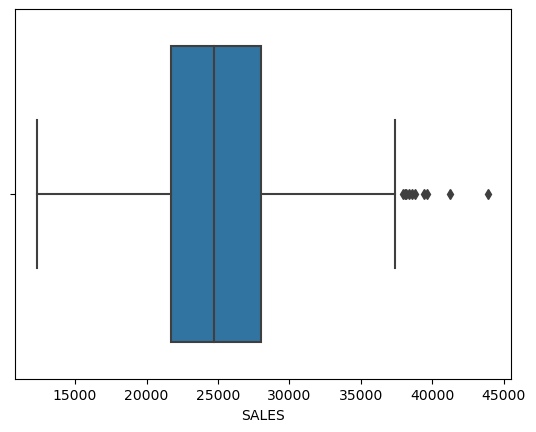

In [23]:
# In this cell, create a box plot with Seaborn for the Sales column in sales_df
# 1 point

sns.boxplot(x=sales_df['SALES'])


In [24]:
# In this cell, detect outliers on Sales using the Inter Quartile Range
# Create a variable called Q1 that is the result of using np.percentile on the Sales column using the 25th (25) percentile 
#    and set the interpolation to 'midpoint'
# Create a variable called Q3 that is the result of using np.percentile on the Sales column using the 75th (75) percentile 
#    and set the interpolation to 'midpoint'
# Create a variable called IQR with is equal to Q3 minus Q1
# Create a variable called upper_bound that is equal to Q3 + (1.5 * IQR)
# Create a variable called lower_bound that is equal to Q1 - (1.5 * IQR)
# Print the upper and lower bounds
# 10 points

Q1 = sales_df['SALES'].quantile(q=0.25, interpolation='midpoint')
Q3 = sales_df['SALES'].quantile(q=0.75, interpolation='midpoint')
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

print(f"Upper bound: {upper_bound}")
print(f"Lower bound: {lower_bound}")


Upper bound: 37554.645000000004
Lower bound: 12184.845


Upper Bound: 37554.65
Lower Bound: 12184.84
New shape of the dataframe: (2823, 14)


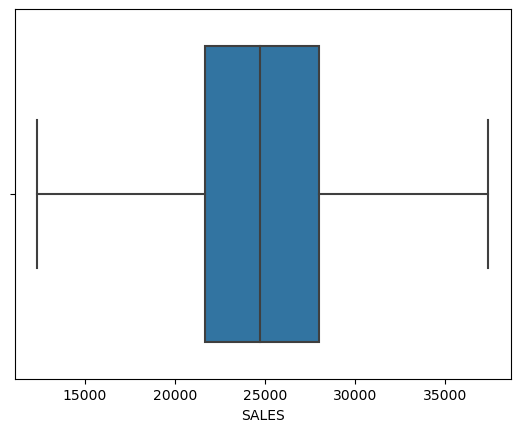

In [26]:
# In this cell, drop rows with outliers on Sales
# Create a new dataframe called sales_df2 that is a copy of sales_df where the Sales column is below the upper_bound 
#   and the Sales column is above the lower_bound
# Print the shape of sales_df2
# Create a box plot with Seaborn for the Sales column in sales_df2
# 5 points

# Drop rows with outliers on Sales
Q1 = sales_df['SALES'].quantile(q=0.25, interpolation='midpoint')
Q3 = sales_df['SALES'].quantile(q=0.75, interpolation='midpoint')
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")

# Create a new dataframe without the outliers
sales_df2 = sales_df[(sales_df['SALES'] <= upper_bound) & (sales_df['SALES'] >= lower_bound)].copy()

# Print the shape of the new dataframe
print(f"New shape of the dataframe: {sales_df2.shape}")

# Create a box plot for the Sales column in the new dataframe
sns.boxplot(x=sales_df2['SALES'])
plt.show()

**NOTE:** Now that you have a new, cleaned dataframe called sales_df2, you will use sales_df2 going forward.

In [51]:
# In this cell, execute the get_single_value_cols function to determine if any columns have one single value on sales_df2
# 1 points
def get_single_value_cols(df):
    '''Returns list of columns that contain only one value'''
    
    single_val_cols = []
    for col in df.columns:
        if len(df[col].unique()) == 1:
            single_val_cols.append(col)
            
    return single_val_cols


get_single_value_cols(sales_df2)

[]

In [52]:
# In this cell, drop columns identified in the output of get_single_value_cols in place using drop() 
# Set in place to True 
# Print the dataframe shape BEFORE AND AFTER dropping single value cols
# Show the first 3 rows of the dataframe
# 5 points

# drop single value columns
single_value_cols = get_single_value_cols(sales_customer_df)
sales_customer_df.drop(single_value_cols, axis=1, inplace=True)

# print shape before and after dropping single value columns
print("Shape before dropping single value columns:", sales_customer_df.shape)
sales_customer_df.drop(single_value_cols, axis=1, inplace=True)
print("Shape after dropping single value columns:", sales_customer_df.shape)

# show first 3 rows of the dataframe
print(sales_customer_df.head(3))

Shape before dropping single value columns: (2823, 19)
Shape after dropping single value columns: (2823, 19)
   ORDER_NUMBER ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
0         10100 2018-01-06                 1           140.000     244.290   
1         10100 2018-01-06                 2           134.000     285.490   
2         10100 2018-01-06                 3           124.000     308.060   

      SALES      PRODUCT_CATEGORY PRODUCT_CODE DEAL_SIZE CUSTOMER_NAME  \
0 16881.290  Fresh Produce Fruits      24_3969     Small       Walmart   
1 22631.610  Fresh Produce Fruits      18_2248    Medium       Walmart   
2 25638.610  Fresh Produce Fruits      18_1749    Medium       Walmart   

   CUSTOMER_ID   CUSTOMER_ADDRESS  CUSTOMER_POSTAL_CODE CUSTOMER_CITY  \
0        82219  9408 Furth Circle                 77001       Houston   
1        82219  9408 Furth Circle                 77001       Houston   
2        82219  9408 Furth Circle                 77001       

In [53]:
# In this cell, use str and title to overwrite Customer Name to titlecase
# 2 points
sales_df2['CUSTOMER_NAME'] = sales_df2['CUSTOMER_NAME'].str.title()


In [54]:
# In this cell, use str and replace to overwrite Product Code replacing the "S" with nothing/empty string
# Run value counts on Product Code
# 3 points

sales_df2['PRODUCT_CODE'] = sales_df2['PRODUCT_CODE'].str.replace('S', '')
print(sales_df2['PRODUCT_CODE'].value_counts())


18_3232     52
18_1097     28
24_1444     28
10_1949     28
18_4668     28
12_1666     28
18_3320     28
10_4962     28
18_2432     28
50_1392     28
24_2840     28
18_1129     28
32_2509     28
24_3856     27
700_4002    27
18_3136     27
24_3420     27
72_1253     27
700_2047    27
18_2238     27
12_4473     27
18_2957     27
24_3371     27
18_2949     27
32_3522     27
700_2824    27
18_3029     27
32_1268     27
700_1138    27
700_3505    27
50_1341     27
18_1984     27
18_2625     27
24_2972     27
24_3949     27
700_2466    26
700_1691    26
12_3380     26
24_3816     26
18_1662     26
24_2841     26
12_1108     26
12_2823     26
18_1889     26
24_1578     26
10_4698     26
10_2016     26
18_3856     26
24_2000     26
18_2319     26
24_4258     26
18_4027     26
32_3207     26
24_4048     26
10_4757     26
700_2610    26
24_2300     26
24_3151     26
700_3962    26
72_3212     26
24_2011     26
18_1342     26
18_1367     26
18_4522     26
18_2795     26
50_1514     26
18_2870   

<hr>

# Working with the Customer Info Data

## 01 Data Ingestion, Initial EDA and Cleaning

In [55]:
# In this cell, complete the following:
#   Read the csv Customer_Info.csv creating a dataframe called "customer_df"
#   Use str and upper() to convert the column headers to uppercase
#   Print the shape of the dataframe
#   Show the first 3 rows of the dataframe
# 4 points

# Read csv file into a dataframe called "customer_df"
customer_df = pd.read_csv('Customer_Info.csv')

# Convert column headers to uppercase using str and upper()
customer_df.columns = customer_df.columns.str.upper()

# Print the shape of the dataframe
print("Shape of customer_df:", customer_df.shape)

# Show the first 3 rows of the dataframe
print(customer_df.head(3))


Shape of customer_df: (45, 8)
   CUSTOMER_ID               CUSTOMER_ADDRESS  CUSTOMER_POSTAL_CODE  \
0        81313        897 Long Airport Avenue                 73301   
1        36763             59 rue de l'Abbaye                 30033   
2        35419  27 rue du Colonel Pierre Avia                 33480   

  CUSTOMER_CITY CUSTOMER_STATE CUSTOMER_COUNTRY      CONTACT_NAME  \
0        Austin             TX              USA          Yu, Kwai   
1       Atlanta             GA              USA     Henriot, Paul   
2    Palm Beach             FL              USA  Da Cunha, Daniel   

  CONTACT_PHONE  
0  +10740359934  
1  759-472-0266  
2  +17238100489  


In [56]:
# In this cell, run duplicated() and any() to determine if the dataframe (customer_df) has any duplicates
# 1 point
print(customer_df.duplicated().any())


True


In [57]:
# In this cell, run duplicated() and sum() to report the number of duplicates in customer_df
# 1 point

duplicates = customer_df.duplicated().sum()
print("Number of duplicates in customer_df:", duplicates)

Number of duplicates in customer_df: 3


In [58]:
# In this cell, print the shape of customer_df
# Drop duplicates in place using drop_duplicates()
# Print the new shape of the dataframe
# 4 points

# Print original shape of customer_df
print("Original shape of customer_df:", customer_df.shape)

# Drop duplicates in place
customer_df.drop_duplicates(inplace=True)

# Print new shape of customer_df
print("New shape of customer_df:", customer_df.shape)


Original shape of customer_df: (45, 8)
New shape of customer_df: (42, 8)


In [59]:
# In this cell, output the data types of customer_df using info()
# 1 point

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CUSTOMER_ID           42 non-null     int64 
 1   CUSTOMER_ADDRESS      42 non-null     object
 2   CUSTOMER_POSTAL_CODE  42 non-null     int64 
 3   CUSTOMER_CITY         42 non-null     object
 4   CUSTOMER_STATE        42 non-null     object
 5   CUSTOMER_COUNTRY      42 non-null     object
 6   CONTACT_NAME          42 non-null     object
 7   CONTACT_PHONE         42 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.0+ KB


## 02 Additional EDA and Data Cleaning

In [60]:
# In this cell, check for missing values using isnull() and sum() in customer_df
# 1 point

print(customer_df.isnull().sum())

CUSTOMER_ID             0
CUSTOMER_ADDRESS        0
CUSTOMER_POSTAL_CODE    0
CUSTOMER_CITY           0
CUSTOMER_STATE          0
CUSTOMER_COUNTRY        0
CONTACT_NAME            0
CONTACT_PHONE           0
dtype: int64


## 04 Additional Data Work

In [61]:
# In this cell, merge sales_df2 and customer_df
# The left dataframe will be sales_df2 and the right dataframe will be customer_df
# Create a new dataframe as the result from the merge called sales_customer_df
# Use merge() with a "left" join on the key of customer ID
# Print the shape of sales_df2 and sales_customer_df after the merge
# Print the head of sales_customer_df
# 7 points

# Merge sales_df2 and customer_df on the key of customer ID
sales_customer_df = sales_df2.merge(customer_df, how='left', on='CUSTOMER_ID')

# Print the shape of sales_df2 and sales_customer_df after the merge
print("Shape of sales_df2: ", sales_df2.shape)
print("Shape of sales_customer_df: ", sales_customer_df.shape)

# Print the head of sales_customer_df
sales_customer_df.head()

Shape of sales_df2:  (2823, 11)
Shape of sales_customer_df:  (2823, 18)


,ORDER_NUMBER,ORDER_DATE,LINE_ITEM_NUMBER,QUANTITY_ORDERED,PRICE_EACH,SALES,PRODUCT_CATEGORY,PRODUCT_CODE,DEAL_SIZE,CUSTOMER_NAME,CUSTOMER_ID,CUSTOMER_ADDRESS,CUSTOMER_POSTAL_CODE,CUSTOMER_CITY,CUSTOMER_STATE,CUSTOMER_COUNTRY,CONTACT_NAME,CONTACT_PHONE
0,10100,2018-01-06,1,140.000,244.290,16881.290,Fresh Produce Fruits,24_3969,Small,Walmart,82219,9408 Furth Circle,77001,Houston,TX,USA,"Hirano, Juri",+13302580017
1,10100,2018-01-06,2,134.000,285.490,22631.610,Fresh Produce Fruits,18_2248,Medium,Walmart,82219,9408 Furth Circle,77001,Houston,TX,USA,"Hirano, Juri",+13302580017
2,10100,2018-01-06,3,124.000,308.060,25638.610,Fresh Produce Fruits,18_1749,Medium,Walmart,82219,9408 Furth Circle,77001,Houston,TX,USA,"Hirano, Juri",+13302580017
3,10100,2018-01-06,4,145.000,313.270,28396.380,Fresh Produce Fruits,18_4409,Small,Walmart,82219,9408 Furth Circle,77001,Houston,TX,USA,"Hirano, Juri",+13302580017
4,10101,2018-01-09,1,109.000,337.600,23357.820,Fresh Produce Fruits,18_2795,Medium,Walmart,79760,1900 Oak St.,77550,Galveston,TX,USA,"Tannamuri, Yoshi",(920)-506-7419


In [62]:
# In this cell, extract the month and day from Order Date, creating a new column for each in sales_customer_df
# Use dt Create a month column called ORDER_MONTH using dt.month
# Create a year column called ORDER_YEAR using dt.year
# Print the first 3 rows of sales_customer_df
# 5 points

sales_customer_df['ORDER_DATE'] = pd.to_datetime(sales_customer_df['ORDER_DATE'])
sales_customer_df['ORDER_MONTH'] = sales_customer_df['ORDER_DATE'].dt.month
sales_customer_df['ORDER_YEAR'] = sales_customer_df['ORDER_DATE'].dt.year
print(sales_customer_df.head(3))

   ORDER_NUMBER ORDER_DATE  LINE_ITEM_NUMBER  QUANTITY_ORDERED  PRICE_EACH  \
0         10100 2018-01-06                 1           140.000     244.290   
1         10100 2018-01-06                 2           134.000     285.490   
2         10100 2018-01-06                 3           124.000     308.060   

      SALES      PRODUCT_CATEGORY PRODUCT_CODE DEAL_SIZE CUSTOMER_NAME  \
0 16881.290  Fresh Produce Fruits      24_3969     Small       Walmart   
1 22631.610  Fresh Produce Fruits      18_2248    Medium       Walmart   
2 25638.610  Fresh Produce Fruits      18_1749    Medium       Walmart   

   CUSTOMER_ID   CUSTOMER_ADDRESS  CUSTOMER_POSTAL_CODE CUSTOMER_CITY  \
0        82219  9408 Furth Circle                 77001       Houston   
1        82219  9408 Furth Circle                 77001       Houston   
2        82219  9408 Furth Circle                 77001       Houston   

  CUSTOMER_STATE CUSTOMER_COUNTRY  CONTACT_NAME CONTACT_PHONE  ORDER_MONTH  \
0             TX   

In [63]:
# In this cell, you will create a dataframe of the total sales by product category
# Create a new dataframe called "product_sales"
# Groupby PRODUCT CATEGORY
# Set as_index to False
# Aggregate by SALES taking the sum
# Print the dataframe product_sales
# 6 points

product_sales = sales_customer_df.groupby('PRODUCT_CATEGORY', as_index=False)['SALES'].sum()
print(product_sales)

           PRODUCT_CATEGORY        SALES
0                      Beef  7407332.680
1                     Bread  1711599.050
2                     Dairy  5560481.190
3      Fresh Produce Fruits 14764481.500
4  Fresh Produce Vegetables 24341475.560
5                      Pork  7946242.800
6                   Poultry  8407582.600


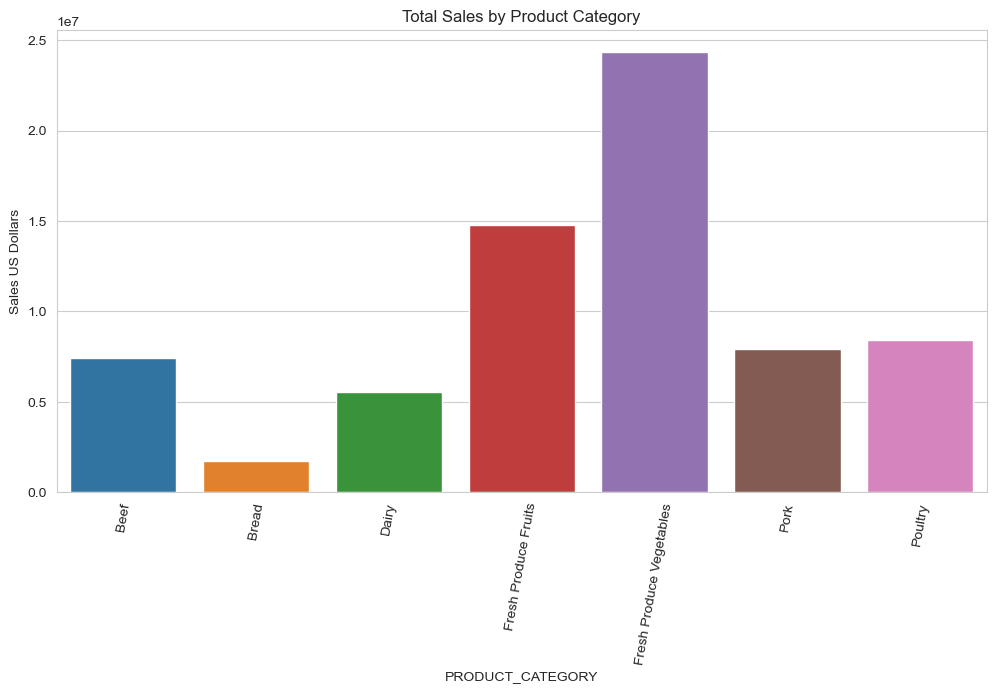

In [64]:
# In this cell, visualize the data created above
# Using seaborn, create a barplot
# Set x to PRODUCT CATEGORY
# Set y to SALES
# Title the graph "Total Sales by Product Category"
# Set xticks to a rotation of 80
# Set the ylabel to "Sales US Dollars"
# 7 points

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="PRODUCT_CATEGORY", y="SALES", data=product_sales)
plt.title("Total Sales by Product Category")
plt.xticks(rotation=80)
plt.ylabel("Sales US Dollars")
plt.show()